<a href="https://colab.research.google.com/github/Miglio7py/Value-at-Risk/blob/main/VaR_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Calcolo VaR con metodo Monte Carlo**

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import norm
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
adj_close_df = pd.DataFrame()
EM35 = pd.read_csv('/content/Dati/Storico EM35.csv')
EM710 = pd.read_csv('/content/Dati/Storico EM710.csv')
LCWD = pd.read_csv('/content/Dati/Storico LCWD.csv')
XMAW = pd.read_csv('/content/Dati/Storico XMAW.csv')

adj_close_df['EM35'] = EM35['Ultimo']
adj_close_df['EM710'] = EM710['Ultimo']
adj_close_df['LCWD'] = LCWD['Ultimo']
adj_close_df['XMAW'] = XMAW['Ultimo']

adj_close_df = adj_close_df.iloc[::-1].reset_index(drop=True)

In [44]:
adj_close_df["EM35"] = adj_close_df["EM35"].astype(str).str.replace(",", ".").astype(float).astype(float)
adj_close_df["EM710"] = adj_close_df["EM710"].astype(str).str.replace(",", ".").astype(float).astype(float)
adj_close_df["LCWD"] = adj_close_df["LCWD"].astype(str).str.replace(",", ".").astype(float).astype(float)
adj_close_df["XMAW"] = adj_close_df["XMAW"].astype(str).str.replace(",", ".").astype(float).astype(float)

<Axes: >

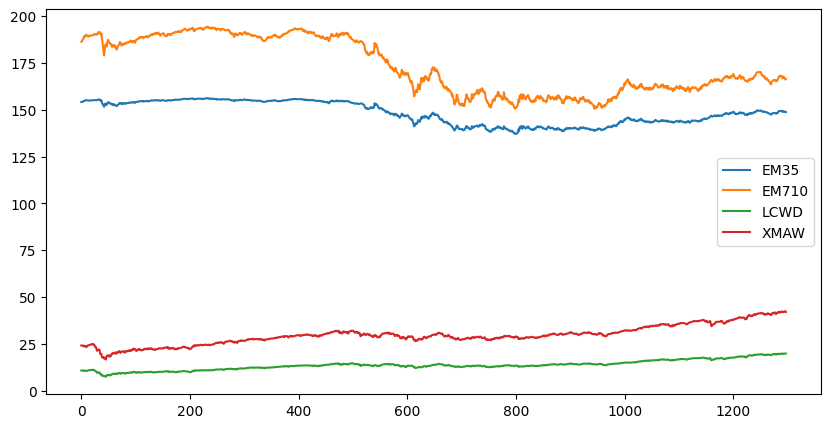

In [4]:
adj_close_df.plot(figsize=(10,5))

In [5]:
r_log_df = np.log(adj_close_df / adj_close_df.shift(1))
r_log_df = r_log_df.dropna()

,EM35,EM710,LCWD,XMAW
1,0.000195,0.001930,-0.001873,-0.003746
2,0.000324,0.001285,0.000937,0.001667
3,0.001490,0.004110,-0.002813,-0.003754
4,0.000518,0.001437,0.004684,0.005002
5,0.002133,0.006363,-0.020775,-0.022284
...,...,...,...,...
1293,-0.000804,-0.000835,-0.001527,-0.001666
1294,-0.000402,-0.003228,0.005081,0.006886
1295,0.000000,-0.000060,0.001013,0.000473
1296,-0.002552,-0.005283,0.003033,0.002126


Funzioni per il calcolo di media e deviazione standard di portafoglio

In [6]:
def expected_return(weights, log_returns):
  return np.sum(log_returns.mean() * weights)

def standard_deviation(weights, cov_matrix):
  variance = weights.T @ cov_matrix @ weights
  return np.sqrt(variance)


Matrice di covarianza

In [7]:
cov_matrix = r_log_df.cov()
cov_matrix

,EM35,EM710,LCWD,XMAW
EM35,0.000005,0.000009,0.000002,0.000002
EM710,0.000009,0.000020,0.000003,0.000004
LCWD,0.000002,0.000003,0.000112,0.000110
XMAW,0.000002,0.000004,0.000110,0.000110


In [33]:
portfolio_value = 10000
#weights = np.array([1/len(r_log_df.columns)]*len(r_log_df.columns))
weights = np.array([0.0936, 0.209, 0.0778, 0.618])
portfolio_return = expected_return(weights, r_log_df)
portfolio_std = standard_deviation(weights, cov_matrix)

print(portfolio_return)
print(portfolio_std)

0.0002810498935453802
0.007484847024205055


**Z-Score** basato su una distribuzione NORMALE

In [34]:
def random_z_score():
  return np.random.normal(0,1)

Funzione per calcolo Scenario

In [35]:
days = 255

def scenario(portfolio_value, portfolio_std_dev, z_score, days):
    return portfolio_value * portfolio_return * days + portfolio_value * portfolio_std_dev * z_score * np.sqrt(days)


In [36]:
simulations = 100000
scenarioReturn = []

for i in range(simulations):
  z_score = random_z_score()
  scenarioReturn.append(scenario(portfolio_value, portfolio_std, z_score, days))


In [47]:
confidence_interval = 0.95
VaR = np.percentile(scenarioReturn, 100 * (1 - confidence_interval))
print(f"VaR al {confidence_interval*100}esimo percentile: {-VaR}")


VaR al 95.0esimo percentile: 594.9087833029525


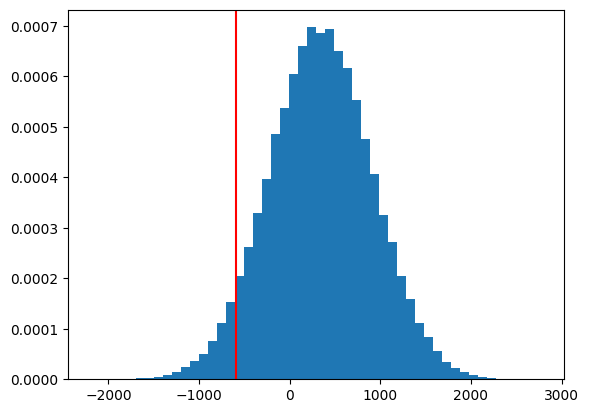

In [48]:
plt.hist(scenarioReturn, bins=50, density=True)
plt.axvline(x=VaR, color='r')
plt.show()